In [ ]:
gt_only_annotations = []

for i, table_annotations in enumerate(annotations):
    table = pd.read_csv(os.path.join(tables_path, "{}.csv".format(tables_names[i])))
    table = table.drop(columns=["idd", "id"])
    for annotation in table_annotations["semanticAnnotations"]["cea"]:
        key = "{}-{}-{}".format(tables_names[i], annotation["idRow"], annotation["idColumn"])
        if key not in gt_mapping:
            continue
        gt_only_annotations.append(annotation)
        gt_only_annotations[-1]["table_name"] = tables_names[i]
        gt_only_annotations[-1]["target"] = gt_mapping[key]["target"]
        gt_only_annotations[-1]["row"] = annotation["idRow"]
        gt_only_annotations[-1]["col"] = annotation["idColumn"]
        gt_only_annotations[-1]["mention"] = table.iloc[annotation["idRow"] - 1, annotation["idColumn"]]

In [ ]:
len(gt_only_annotations)

916

In [ ]:
features_df = []
for annotation in gt_only_annotations:
    if len(annotation["entity"]) > 0:
        features_df.append(
            {
                **{
                    "table_name": annotation["table_name"],
                    "row": annotation["row"],
                    "col": annotation["col"],
                    "mention": annotation["mention"],
                    "target": annotation["target"],
                },
                **(
                    {f["id"]: f["value"] for f in annotation["entity"][0]["features"]}
                    if len(annotation["entity"]) > 0
                    else {}
                ),
            }
    )
features_df = pd.DataFrame(features_df)
features_df

,table_name,row,col,mention,target,delta,omega,ncorrects_tokens,cpa_t4,p_subj_lit_datatype,...,p_subj_lit_row,p_subj_ne,ntoken_entity,jaccard_score,cpa_t3,desc,length_mention,es_score,popularity,ambiguity_mention
0,Github_Testset,102,0,Flare,NIL,0.001,0.010,1.0,0,0,...,0,0,1,1.00,0,0.000,5,1.000,0.00,0.809
1,Github_Testset,104,0,Trajano,NIL,0.013,0.024,1.0,0,0,...,0,0,1,1.00,0,0.000,7,1.000,0.00,0.225
2,Github_Testset,107,0,SNOW,NIL,0.002,0.009,1.0,0,0,...,0,0,1,1.00,0,0.000,4,0.971,0.00,0.959
3,Github_Testset,108,0,Elmagin Capital,NIL,0.001,0.009,0.5,0,0,...,0,0,1,0.50,0,0.000,15,1.000,0.00,0.000
4,Github_Testset,109,0,Code for IRAQ,NIL,0.001,0.011,1.0,0,0,...,0,0,3,0.67,0,0.000,13,0.961,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,Github_Testset,844,0,Alcon,Q684825,0.001,0.011,1.0,0,0,...,0,0,1,1.00,0,0.000,5,0.963,0.03,0.415
666,Github_Testset,846,0,banco de la rep blica,Q686329,0.383,0.402,0.8,0,0,...,0,0,4,0.60,0,0.000,21,0.939,0.02,0.000
667,Github_Testset,847,0,USI - University of Lugano,Q689617,0.500,0.541,1.0,0,0,...,0,0,3,0.60,0,0.333,26,1.000,0.02,0.000
668,Github_Testset,849,0,Mugla Sitki Koçman University,Q6944541,0.034,0.036,1.0,0,0,...,0,0,4,0.50,0,0.167,29,0.757,0.00,0.000


In [ ]:
gt_only_annotations_df = []
for annotation in gt_only_annotations:
    gt_only_annotations_df.append(
        {
            "table_name": annotation["table_name"],
            "row": annotation["idRow"],
            "col": annotation["idColumn"],
            "candidates": len(annotation["entity"]),
            "score": annotation["entity"][0]["score"] if len(annotation["entity"]) > 0 else 0,
            "target": annotation["target"],
            "prediction": annotation["entity"][0]["id"] if len(annotation["entity"]) > 0 else "",
            "target_in_candidates": annotation["target"] in [c["id"] for c in annotation["entity"]],
            "mention": annotation["mention"],
        }
    )

In [ ]:
gt_only_annotations_df = pd.DataFrame(gt_only_annotations_df)

In [ ]:
gt_only_annotations_df

,table_name,row,col,candidates,score,target,prediction,target_in_candidates,mention
0,Github_Testset,101,0,0,0.000,NIL,,False,@bytemine-io
1,Github_Testset,102,0,50,0.024,NIL,Q17224798,False,Flare
2,Github_Testset,103,0,0,0.000,NIL,,False,Idelica
3,Github_Testset,104,0,31,0.040,NIL,Q37546733,False,Trajano
4,Github_Testset,105,0,0,0.000,NIL,,False,niway.dev
...,...,...,...,...,...,...,...,...,...
911,Github_Testset,846,0,49,0.430,Q686329,Q686329,True,banco de la rep blica
912,Github_Testset,847,0,42,0.603,Q689617,Q689617,True,USI - University of Lugano
913,Github_Testset,848,0,0,0.000,Q690639,,False,https://www.aau.at
914,Github_Testset,849,0,35,0.038,Q6944541,Q6944541,True,Mugla Sitki Koçman University


In [ ]:
gt_only_annotations_df["alligator_match"] = (
    np.where(
        gt_only_annotations_df["candidates"] > 0,
        gt_only_annotations_df["prediction"],
        "NIL",
    )
    == gt_only_annotations_df["target"]
).astype(int)

In [ ]:
gt_only_annotations_df["nil_label"] = np.where(
    gt_only_annotations_df["target"].to_numpy() == "NIL", "NIL", "Not NIL"
)

In [ ]:
gt_only_annotations_df_sub = gt_only_annotations_df.copy()
gt_only_annotations_df_sub

,table_name,row,col,candidates,score,target,prediction,target_in_candidates,mention,alligator_match,nil_label
0,Github_Testset,101,0,0,0.000,NIL,,False,@bytemine-io,1,NIL
1,Github_Testset,102,0,50,0.024,NIL,Q17224798,False,Flare,0,NIL
2,Github_Testset,103,0,0,0.000,NIL,,False,Idelica,1,NIL
3,Github_Testset,104,0,31,0.040,NIL,Q37546733,False,Trajano,0,NIL
4,Github_Testset,105,0,0,0.000,NIL,,False,niway.dev,1,NIL
...,...,...,...,...,...,...,...,...,...,...,...
911,Github_Testset,846,0,49,0.430,Q686329,Q686329,True,banco de la rep blica,1,Not NIL
912,Github_Testset,847,0,42,0.603,Q689617,Q689617,True,USI - University of Lugano,1,Not NIL
913,Github_Testset,848,0,0,0.000,Q690639,,False,https://www.aau.at,0,Not NIL
914,Github_Testset,849,0,35,0.038,Q6944541,Q6944541,True,Mugla Sitki Koçman University,1,Not NIL


In [ ]:
gt_only_annotations_df_sub[["alligator_match"]].mean(axis=0)

alligator_match    0.407205
dtype: float64

In [ ]:
gt_only_annotations_df_sub[gt_only_annotations_df_sub["target"] != "NIL"][["alligator_match"]].mean(axis=0)

alligator_match    0.433921
dtype: float64

In [ ]:
gt_only_annotations_df_sub.groupby("nil_label")["nil_label"].value_counts()

nil_label
NIL        462
Not NIL    454
Name: count, dtype: int64

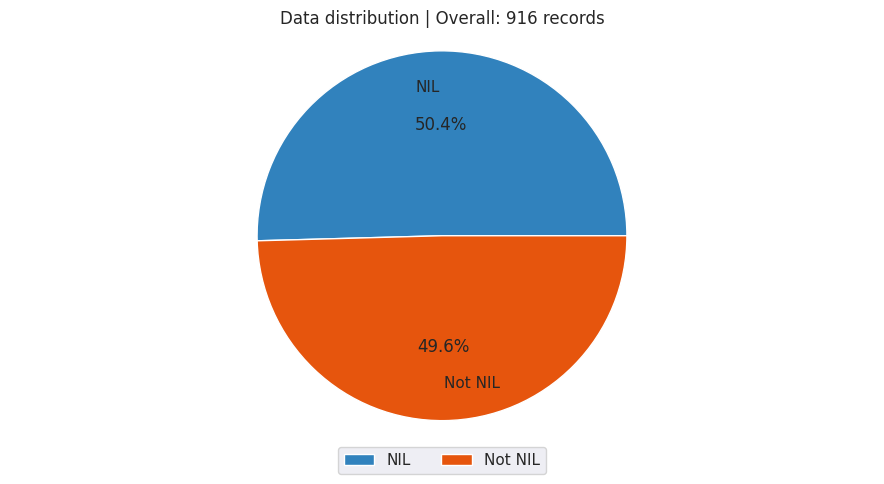

In [ ]:
sns.set_context("paper")
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(9, 5))
size = 0.3
nil = gt_only_annotations_df_sub.groupby("nil_label")["nil_label"].value_counts()
vals = nil.to_numpy()
cmap = plt.get_cmap("tab20c")
inner_colors = cmap(np.arange(3) * 4)
ax.pie(
    vals.flatten(),
    colors=inner_colors,
    labels=["NIL", "Not NIL"],
    autopct="%1.1f%%",
    labeldistance=0.8,
    wedgeprops=dict(edgecolor="w"),
)

plt.legend()
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.0), ncol=3)
plt.axis("equal")
plt.title(f"Data distribution | Overall: {len(gt_only_annotations_df_sub)} records")
plt.tight_layout()
plt.show()

In [ ]:
# Prediction with NIL threshold = 0.2
gt_only_annotations_df_sub["nil_prediction@0.2"] = np.where(
    (gt_only_annotations_df_sub["score"] >= 0.2) & (gt_only_annotations_df_sub["candidates"] > 0),
    gt_only_annotations_df_sub["prediction"],
    "NIL",
)
gt_only_annotations_df_sub["nil_match@0.2"] = (
    gt_only_annotations_df_sub["nil_prediction@0.2"] == gt_only_annotations_df_sub["target"]
).astype(int)

In [ ]:
alligator_tp = 0
alligator_tn = 0
alligator_fn = 0
alligator_fp = 0
for i, (_, row) in enumerate(gt_only_annotations_df_sub.iterrows()):
    if row["candidates"] == 0:
        if row["nil_label"] == "NIL":
            alligator_tp += 1
        else:
            alligator_fp += 1
    elif row["candidates"] > 0:
        assert row.prediction != "NIL"
        if row["nil_label"] != "NIL":
            alligator_tn += 1
        else:
            # There's some candidates, score is above threshold but target is NIL
            alligator_fn += 1
    else:
        raise ValueError("Unexpected case")
alligator_recall = alligator_tp / (alligator_tp + alligator_fn)
alligator_precision = alligator_tp / (alligator_tp + alligator_fp)
alligator_f1 = 2 * (alligator_precision * alligator_recall) / (alligator_precision + alligator_recall)
alligator_acc = (alligator_tp + alligator_tn) / (alligator_tp + alligator_tn + alligator_fp + alligator_fn)
print("Alligator accuracy: {:.4f}".format(alligator_acc))
print("Precision: {:.4f}".format(alligator_precision))
print("Recall: {:.4f}".format(alligator_recall))
print("F1: {:.4f}".format(alligator_f1))

Alligator accuracy: 0.6114
Precision: 0.7154
Recall: 0.3810
F1: 0.4972


In [ ]:
thresholds = np.linspace(0, 1, 25)
accuracies = []
precisions = []
recalls = []
f1s = []

for threshold in thresholds:
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    predicted = 0
    annotations = 0
    for i, (_, row) in enumerate(gt_only_annotations_df_sub.iterrows()):
        if row["candidates"] == 0 or row["score"] <= threshold:  # If a prediction is NIL
            if row["nil_label"] == "NIL":
                tp += 1
            else:
                fp += 1
        elif row["candidates"] > 0:  # If a prediction is not NIL, i.e. a QID
            if row["nil_label"] != "NIL":
                tn += 1
            else:
                # There's some candidates, score is above threshold but target is NIL
                fn += 1
        else:
            raise ValueError("Unexpected case")
    assert tp + tn + fp + fn == len(gt_only_annotations_df_sub)
    print("Threshold", threshold, tp, tn, fp, fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    accuracies.append((tp + tn) / (tp + tn + fp + fn))
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

Threshold 0.0 178 380 74 284
Threshold 0.041666666666666664 373 214 240 89
Threshold 0.08333333333333333 427 172 282 35
Threshold 0.125 436 152 302 26
Threshold 0.16666666666666666 447 139 315 15
Threshold 0.20833333333333331 450 134 320 12
Threshold 0.25 453 126 328 9
Threshold 0.29166666666666663 454 121 333 8
Threshold 0.3333333333333333 455 112 342 7
Threshold 0.375 455 110 344 7
Threshold 0.41666666666666663 455 105 349 7
Threshold 0.4583333333333333 456 98 356 6
Threshold 0.5 456 87 367 6
Threshold 0.5416666666666666 456 85 369 6
Threshold 0.5833333333333333 457 81 373 5
Threshold 0.625 457 72 382 5
Threshold 0.6666666666666666 457 66 388 5
Threshold 0.7083333333333333 457 61 393 5
Threshold 0.75 457 55 399 5
Threshold 0.7916666666666666 457 49 405 5
Threshold 0.8333333333333333 458 44 410 4
Threshold 0.875 458 43 411 4
Threshold 0.9166666666666666 459 35 419 3
Threshold 0.9583333333333333 459 20 434 3
Threshold 1.0 462 0 454 0


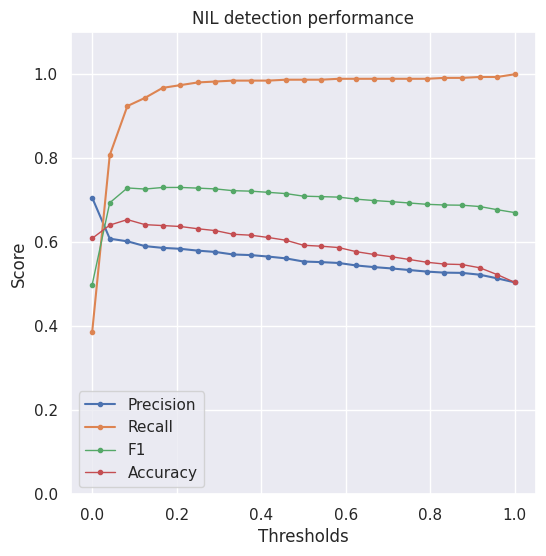

In [ ]:
# Plot precision-recall curve against thresholds
sns.set_context("paper")
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(thresholds, precisions, marker="o", label="Precision", markersize=3)
ax.plot(thresholds, recalls, marker="o", label="Recall", markersize=3)
ax.plot(thresholds, f1s, marker="o", label="F1", linewidth=1, markersize=3)
ax.plot(thresholds, accuracies, marker="o", label="Accuracy", linewidth=1, markersize=3)
ax.set_ylim(0, 1.1)
plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("Score")
plt.title("NIL detection performance")
plt.show()

In [ ]:
threshold = 0.2
alligator_nil_tp = 0
alligator_nil_tn = 0
alligator_nil_fp = 0
alligator_nil_fn = 0
for i, (_, row) in enumerate(gt_only_annotations_df_sub.iterrows()):
    if row["candidates"] == 0 or row["score"] < threshold:
        if row["nil_label"] == "NIL":
            alligator_nil_tp += 1
        else:
            alligator_nil_fp += 1
    elif row["candidates"] > 0:
        assert row.prediction != "NIL"
        if row["nil_label"] != "NIL":
            alligator_nil_tn += 1
        else:
            # There's some candidates, score is above threshold but target is NIL
            alligator_nil_fn += 1
    else:
        raise ValueError("Unexpected case")
alligator_nil_recall = alligator_nil_tp / (alligator_nil_tp + alligator_nil_fn)
alligator_nil_precision = (
    alligator_nil_tp / (alligator_nil_tp + alligator_nil_fp) if alligator_nil_tp + alligator_nil_fp > 0 else 0
)
alligator_nil_f1 = (
    2 * (alligator_nil_precision * alligator_nil_recall) / (alligator_nil_precision + alligator_nil_recall)
    if alligator_nil_precision + alligator_nil_recall > 0
    else 0
)
alligator_nil_acc = (alligator_nil_tp + alligator_nil_tn) / (
    alligator_nil_tp + alligator_nil_tn + alligator_nil_fp + alligator_nil_fn
)
print("Alligator accuracy: {:.4f}".format(alligator_nil_acc))
print("Precision: {:.4f}".format(alligator_nil_precision))
print("Recall: {:.4f}".format(alligator_nil_recall))
print("F1: {:.4f}".format(alligator_nil_f1))

Alligator accuracy: 0.6386
Precision: 0.5852
Recall: 0.9740
F1: 0.7311
